In [ ]:
import pandas as pd
# 데이터 분석을 용이하게 해주는 pandas 라이브러리
import lightgbm as lgb
# lightgbm 이라는 모델 활용

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화 관객수/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화 관객수/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화 관객수/submission.csv')

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
train.tail()
# tail함수를 사용해서 표 아래쪽부터 확인할 수도 있음

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [ ]:
print(train.shape)
print(test.shape)
# 행이 train데이터보다 한 개 적은 이유는, 최종적으로 예측해야되는 영화의 관객수는 직접 예측을 해야하기 때문에
print(submission.shape)
# 영화 제목과 영화 관객수로 이루어지기 때문에 2개로 이루어짐

(600, 12)
(243, 11)
(243, 2)


In [ ]:
train.info()
# 7   dir_prev_bfnum  270 non-null    float64 은 270으로 다른 행에 비해서 값이 적기 때문에, 나중에 전처리를 해야됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
# 숫자 조정 코드

In [ ]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [ ]:
pd.reset_option('display.float_format')
# 숫자 복원 코드

In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [ ]:
import seaborn as sns

<Axes: >

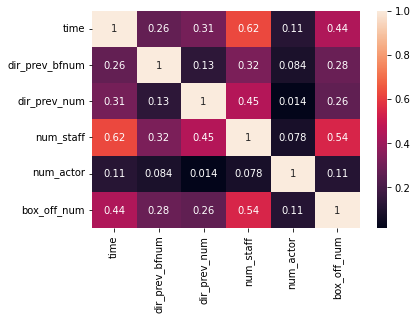

In [ ]:
# 예측해야 하는 것 -> 영화 별 관객 수 -> box_off_num -> 관련이 깊은 변수들을 확인 -> 선형 관계가 강한 것(num_staff 스태프 수)
sns.heatmap(train.corr(), annot = True)
# annot=True -> 각 셀 안에 값 표시

In [ ]:
# 모델 생성
# lightgbm에서 train이라는 함수 사용
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)
# sequential -> 잘 못맞춘 부분에 가중치를 줘서 다시 학습을 시킴

In [ ]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num']
# target = 영화 관객 수

In [ ]:
X_train, X_test, y_train = train[features], test[features], train[target]
# 콤마(,)로 구분하면 구분된 순서에 따라서 하나씩 저장함

# train 데이터, test 데이터에 어떤 데이터를 넣을건지 지정할 수도 있구나,,,

In [ ]:
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [ ]:
singleLGBM = submission.copy()

In [ ]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [ ]:
singleLGBM.to_csv('singleLGBM.csv', index = False)

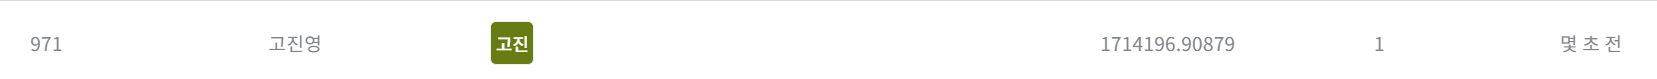

In [ ]:
# 교차검증 -> 모델을 쪼개서 사용
# 과대적합을 방지하기 위함
# 모델 간 일반적인 성능을 비교하기 위해서 사용함

from sklearn.model_selection import KFold

In [ ]:
train
# 순서에 의한 영향이 있을 수 있음 -> shuffle을 진행함

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []
# k_fold 할 때, 모델을 담을 수 있는 바구니(리스트 생성)
for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]
  #iloc 통해서 추출
  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))
  # verbose -> 100번마다 모델의 성능에 대한 값을 출력해달라
  # early_stopping -> 모델의 성능이 유의미하게 높아지지 않으면 멈춤 -> lightgbm 안에서의 기능으로 구현되어 있음

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.70572e+12
[100]	valid_0's l2: 3.90847e+12
[100]	valid_0's l2: 3.50344e+12
[100]	valid_0's l2: 1.45977e+12
[100]	valid_0's l2: 1.77214e+12


In [ ]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [ ]:
from pandas.core.arrays.base import mode
preds = []
for model in models:
  preds.append(model.predict(X_test))
len(preds)

# 모델 하나씩 묶어서 저장해줌 -> 5개 나올 것

5

In [ ]:
kfoldLightGBM = submission.copy()

In [ ]:
preds

[array([3367422.08211024,  961138.88337016, 1097929.67851313,
        2097270.81999921,  781476.31131047,  123133.23396977,
          84085.01896248,  199222.92670303,  124854.97973097,
        1072684.78820647,  657040.55769984, 1644701.47160779,
         924735.72080619,  191699.58415836,  723218.39948755,
        2395613.42888462,  113180.54906592, 1882765.92812296,
          97286.47282983,  417270.42113431,  161482.3367577 ,
          63495.73363115,  598057.42337284,  249411.25868881,
         308424.71884273, 1319518.60852241,  202273.52740684,
        1076683.13768137,  491636.41945325,  183406.6380314 ,
        1740233.45816734,   86696.17528125,  440430.29773088,
        2040944.13061099,  113375.45695331,  531746.29484356,
         106207.35971699,  169560.79581187,  158101.0895316 ,
          95037.29701059,  466355.50624629,  197548.63265325,
         198810.0901353 ,  682743.4340129 ,  679265.22397749,
         617812.91125278,  219182.85833837,   83712.10602149,
        

In [ ]:
# 평균을 내기 위해서
import numpy as np

In [ ]:
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [ ]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3.367422e+06
1,아빠가 여자를 좋아해,9.611389e+05
2,하모니,1.097930e+06
3,의형제,2.097271e+06
4,평행 이론,7.814763e+05


In [ ]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index = False)

In [ ]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [ ]:
train.columns

# genre 데이터 활용

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [ ]:
train.genre
# 문자로 되어있는데, 학습을 할때, 숫자가 되어야 함
# 문자열 값을 숫자로 변환해야됨

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])
# 단어를 숫자로 변환
# fit.transform -> 각각의 단어를 어떤 단어로 바꿀지 학습하는 과정

In [ ]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [ ]:
test['genre'] = le.transform(test['genre'])
# 다시 변환해 주어야 함!
# transform -> 학습을 해줄 필요가 없으니, transform만 해줌

In [ ]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']

In [ ]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.66646e+12
[100]	valid_0's l2: 4.35145e+12
[100]	valid_0's l2: 3.25406e+12
[100]	valid_0's l2: 1.66671e+12
[100]	valid_0's l2: 1.61787e+12


In [ ]:
# 예측하는 과정
preds = []
for model in models:
  preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
X_test.head()

# genre가 숫자로 변함!

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,3.005290e+05,2
1,113,4,275,3,3.427002e+05,5
2,115,3,419,7,4.206611e+06,4
3,116,2,408,2,6.913420e+05,10
4,110,1,380,1,3.173800e+04,1


In [ ]:
feLightGBM = submission.copy()

In [ ]:
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)
feLightGBM.to_csv('feLightGBM.csv', index = False)

In [ ]:
# 모델 튜닝 -> Grid
from sklearn.model_selection import GridSearchCV

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'min_child_samples': [20, 30]}
# learning_rate 와 min_child_samples 을 3:2, 6개의 조합으로 만들어봄
# learning_rate 은 sequential에서 다음모델에 얼마만큼을 반영할 것인가
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv = k_fold)
# k_fold에 5을 넣어도 됨

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_
# 가장 좋은 조합


{'learning_rate': 0.003, 'min_child_samples': 30}

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000, learning_rate=0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.56673e+12
[200]	valid_0's l2: 2.45571e+12
[300]	valid_0's l2: 2.42703e+12
[400]	valid_0's l2: 2.43413e+12
[100]	valid_0's l2: 4.89205e+12
[200]	valid_0's l2: 4.41023e+12
[300]	valid_0's l2: 4.19237e+12
[400]	valid_0's l2: 4.05786e+12
[500]	valid_0's l2: 3.96844e+12
[600]	valid_0's l2: 3.91559e+12
[700]	valid_0's l2: 3.88363e+12
[800]	valid_0's l2: 3.87481e+12
[900]	valid_0's l2: 3.86706e+12
[1000]	valid_0's l2: 3.86692e+12
[100]	valid_0's l2: 3.14399e+12
[200]	valid_0's l2: 2.79082e+12
[300]	valid_0's l2: 2.59034e+12
[400]	valid_0's l2: 2.47435e+12
[500]	valid_0's l2: 2.3988e+12
[600]	valid_0's l2: 2.35732e+12
[700]	valid_0's l2: 2.38484e+12
[100]	valid_0's l2: 1.61311e+12
[200]	valid_0's l2: 1.41658e+12
[300]	valid_0's l2: 1.32013e+12
[400]	valid_0's l2: 1.27379e+12
[500]	valid_0's l2: 1.25835e+12
[100]	valid_0's l2: 1.96152e+12
[200]	valid_0's l2: 1.75566e+12
[300]	valid_0's l2: 1.64483e+12
[400]	valid_0's l2: 1.58154e+12
[500]	valid_0's l2: 1.54088e+12
[600]	va

In [ ]:
preds = []
for model in models:
  preds.append(model.predict(X_test))

In [ ]:
gs.best_score_
gslgbm = submission.copy()
gslgbm['box_off_num'] = np.mean(preds, axis = 0)
gslgbm.to_csv('gslgbm.csv', index = False)

# 성능이 더 좋게 나오려면, 훈련셋이 좀 더 많아야됨